Architecture: 2 inputs → 4 hidden neurons → 1 output

TRAINING PROGRESS:
------------------------------
Epoch    0 | Loss: 0.6916 | Accuracy: 0.5000
Epoch  200 | Loss: 0.3436 | Accuracy: 0.8500
Epoch  400 | Loss: 0.3195 | Accuracy: 0.8450
Epoch  600 | Loss: 0.3161 | Accuracy: 0.8400
Epoch  800 | Loss: 0.3141 | Accuracy: 0.8450


/var/folders/bb/lpydk_w56vx5yz8y7fvtqqv80000gn/T/ipykernel_61711/3672398981.py:150: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
/var/folders/bb/lpydk_w56vx5yz8y7fvtqqv80000gn/T/ipykernel_61711/3672398981.py:150: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/var/folders/bb/lpydk_w56vx5yz8y7fvtqqv80000gn/T/ipykernel_61711/3672398981.py:150: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/c

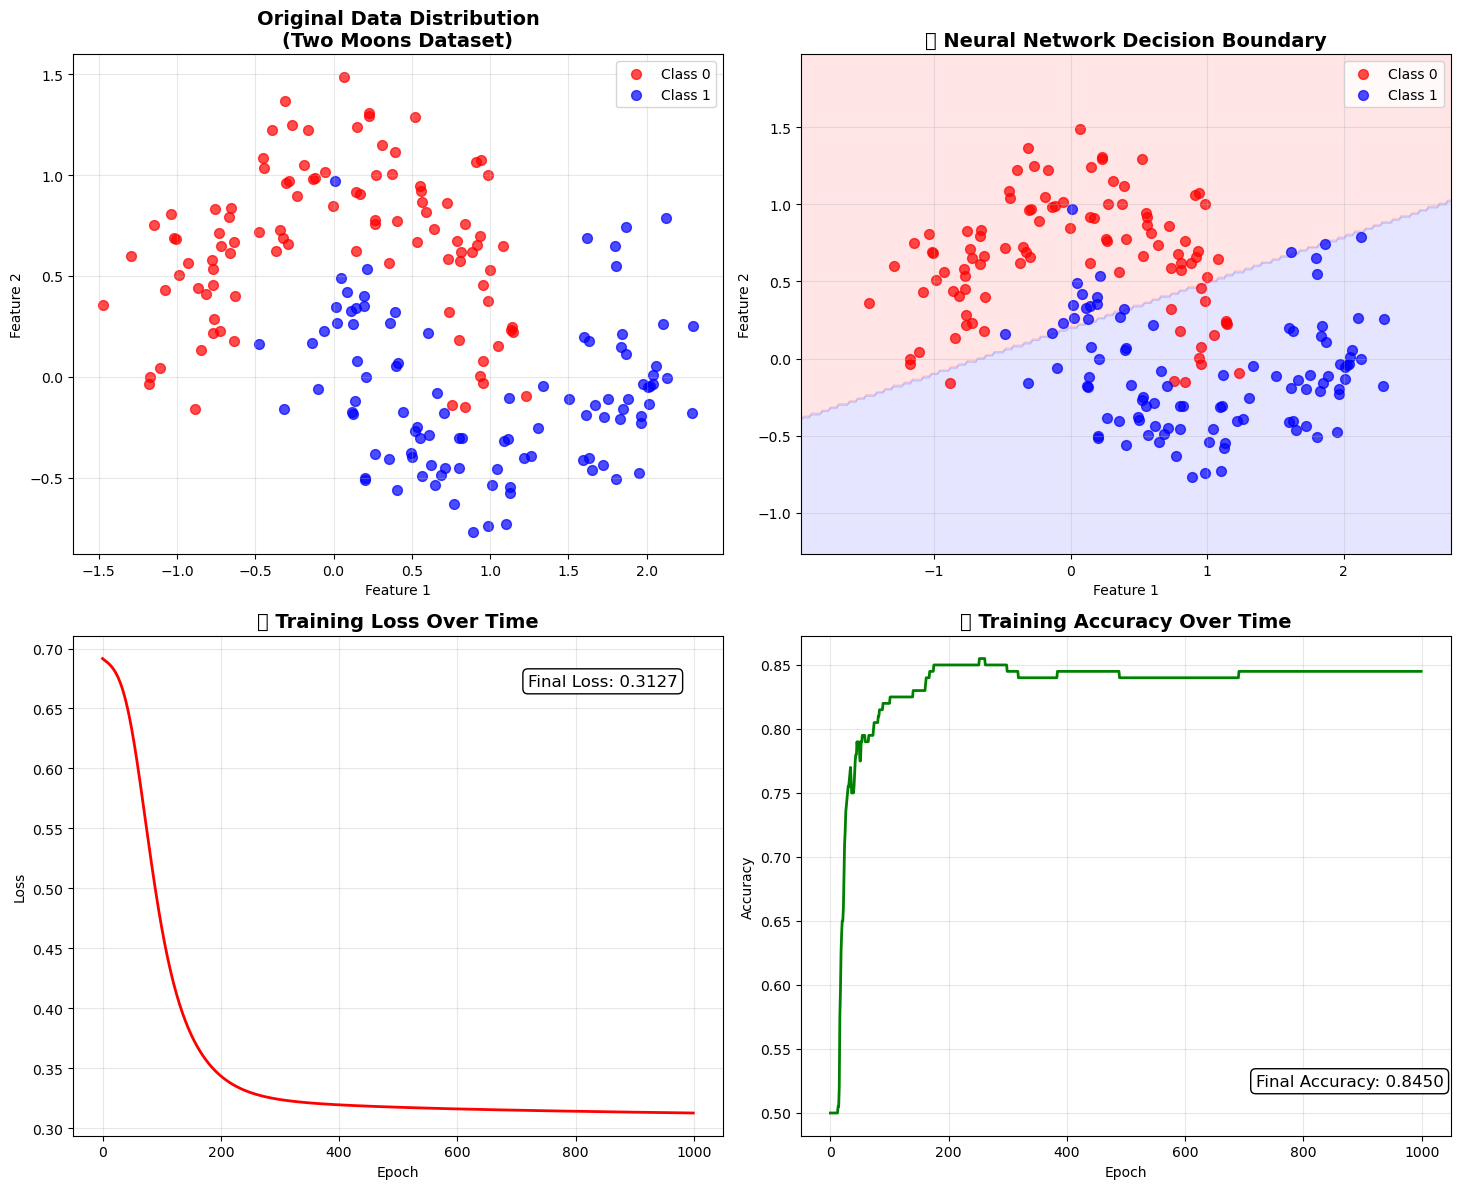

Final Training Accuracy: 0.8450 (84.50%)
Final Loss: 0.3127

NETWORK ARCHITECTURE:
Input Layer: 2 neurons (features)
Hidden Layer: 4 neurons with sigmoid activation
Output Layer: 1 neuron with sigmoid activation
Total Parameters: 17
Learning Rate: 0.5


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

# Set up the plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights and biases with small random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        # Forward propagation: Input -> Hidden -> Output
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)  # Hidden layer activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)  # Output layer activation
        return self.a2
    
    def backward(self, X, y, output):
        # Backward propagation: Calculate gradients and update weights
        m = X.shape[0]
        
        # Output layer gradients
        dZ2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
        
        # Hidden layer gradients
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs):
        losses = []
        accuracies = []
        
        print("\nTRAINING PROGRESS:")
        print("-" * 30)
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Calculate loss
            loss = -np.mean(y * np.log(output + 1e-8) + (1 - y) * np.log(1 - output + 1e-8))
            losses.append(loss)
            
            # Calculate accuracy
            predictions = (output > 0.5).astype(int)
            accuracy = np.mean(predictions == y)
            accuracies.append(accuracy)
            
            # Backward pass
            self.backward(X, y, output)
            
            if epoch % 200 == 0:
                print(f"Epoch {epoch:4d} | Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")
        
        return losses, accuracies
    
    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)
    
    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Generate sample data (moons dataset - non-linearly separable)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# Create and train neural network
print("Architecture: 2 inputs → 4 hidden neurons → 1 output")
nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.5)

# Train the network
losses, accuracies = nn.train(X, y, epochs=1000)

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Original data
ax1.scatter(X[y[:,0]==0, 0], X[y[:,0]==0, 1], c='red', label='Class 0', alpha=0.7, s=50)
ax1.scatter(X[y[:,0]==1, 0], X[y[:,0]==1, 1], c='blue', label='Class 1', alpha=0.7, s=50)
ax1.set_title('Original Data Distribution\n(Two Moons Dataset)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax2.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
ax2.scatter(X[y[:,0]==0, 0], X[y[:,0]==0, 1], c='red', label='Class 0', alpha=0.7, s=50)
ax2.scatter(X[y[:,0]==1, 0], X[y[:,0]==1, 1], c='blue', label='Class 1', alpha=0.7, s=50)
ax2.set_title('🎯 Neural Network Decision Boundary', fontsize=14, fontweight='bold')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Training loss
ax3.plot(losses, color='red', linewidth=2)
ax3.set_title('📉 Training Loss Over Time', fontsize=14, fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.grid(True, alpha=0.3)
ax3.text(0.7, 0.9, f'Final Loss: {losses[-1]:.4f}', 
         transform=ax3.transAxes, fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

# Plot 4: Training accuracy
ax4.plot(accuracies, color='green', linewidth=2)
ax4.set_title('📈 Training Accuracy Over Time', fontsize=14, fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Accuracy')
ax4.grid(True, alpha=0.3)
ax4.text(0.7, 0.1, f'Final Accuracy: {accuracies[-1]:.4f}', 
         transform=ax4.transAxes, fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.tight_layout()
plt.show()

# Print final results
final_accuracy = nn.accuracy(X, y)

print(f"Final Training Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"Final Loss: {losses[-1]:.4f}")

print("\nNETWORK ARCHITECTURE:")
print(f"Input Layer: 2 neurons (features)")
print(f"Hidden Layer: 4 neurons with sigmoid activation")
print(f"Output Layer: 1 neuron with sigmoid activation")
print(f"Total Parameters: {(2*4 + 4) + (4*1 + 1)}")
print(f"Learning Rate: 0.5")